**Ruiqi Liu**  
**CS6220**  
**Assignment 3**  
**2/1/2025**  

---

## Prepare Environment and Load Data


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.datasets import fetch_openml

# For reproducibility
np.random.seed(42)

# Load the Fashion-MNIST dataset from OpenML
data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

# Convert data to numpy arrays
X = np.array(data, dtype=np.float64)
y = np.array(labels, dtype=int)

print("Data shape:", X.shape)
print("Labels shape:", y.shape)

# Scale data to [0,1]
X /= 255.0

# For visualization, take a subset of the data to reduce plotting time.
num_samples = 2000
indices = np.random.choice(len(X), size=num_samples, replace=False)
X_sample = X[indices]
y_sample = y[indices]

print("Sampled data shape:", X_sample.shape)
print("Sampled labels shape:", y_sample.shape)


Data shape: (70000, 784)
Labels shape: (70000,)
Sampled data shape: (2000, 784)
Sampled labels shape: (2000,)


## Part 1: PCA [40 Points]

1. **Apply PCA projection of the features of the Fashion MNIST dataset in 2 dimensions.**  
2. **Show a scatter plot of the reduced dimension. Use separate color for each class of the data.**  
3. **Show how much variance ratio is explained by the reduced dimension.**


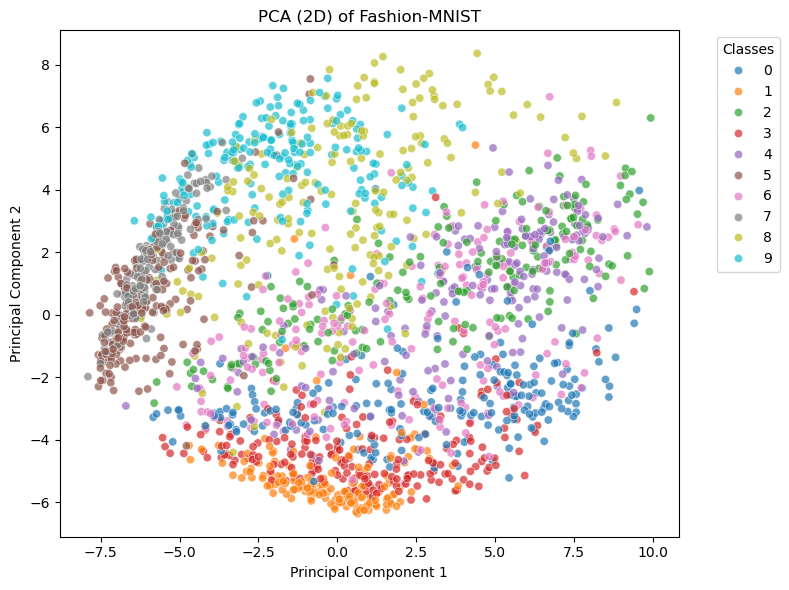

PCA - Explained Variance Ratio (2D): [0.2908605  0.17943128]
Total Variance Explained by PCA (2D): 47.03%


In [3]:
# Instantiate PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# Fit PCA on the sampled subset and transform it into 2D
X_pca = pca.fit_transform(X_sample)

# Extract the explained variance ratio
variance_ratio_pca = pca.explained_variance_ratio_

# Scatter plot of the 2D PCA projection
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_sample, 
                palette='tab10', legend='full', alpha=0.7)

plt.title("PCA (2D) of Fashion-MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print how much variance is explained by the 2 dimensions
print("PCA - Explained Variance Ratio (2D):", variance_ratio_pca)
print("Total Variance Explained by PCA (2D): {:.2f}%".format(variance_ratio_pca.sum()*100))


## Part 2: Another Reduction Method [35 Points]

1. **Apply another reduction method on the features of the Fashion MNIST dataset in 2 dimensions.**  
2. **Show a scatter plot of the reduced dimension. Use separate color for each class of the data.**  
3. **Show how much variance ratio is explained by the reduced dimension.**


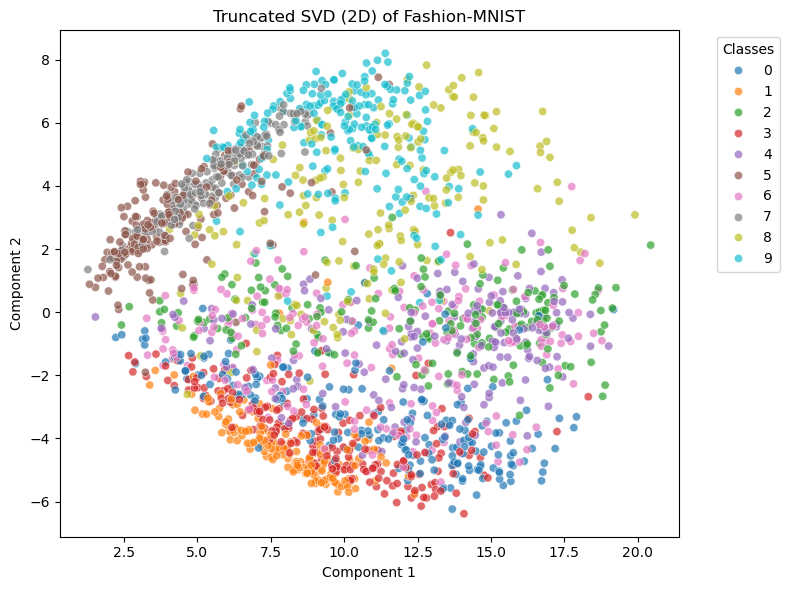

TruncatedSVD - Explained Variance Ratio (2D): [0.24932167 0.1949113 ]
Total Variance Explained by TruncatedSVD (2D): 44.42%


In [4]:
# We will use TruncatedSVD as another linear dimensionality reduction method.
# TruncatedSVD can produce an explained_variance_ratio_, making it comparable to PCA.
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_sample)
variance_ratio_svd = svd.explained_variance_ratio_

# Scatter plot of the 2D SVD projection
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_svd[:,0], y=X_svd[:,1], hue=y_sample, 
                palette='tab10', legend='full', alpha=0.7)

plt.title("Truncated SVD (2D) of Fashion-MNIST")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print how much variance is explained by the 2 dimensions
print("TruncatedSVD - Explained Variance Ratio (2D):", variance_ratio_svd)
print("Total Variance Explained by TruncatedSVD (2D): {:.2f}%".format(variance_ratio_svd.sum()*100))


## Part 3: Conceptual Questions [25 Points]

**Questions:**  
1. **Compare the variance ratio explained by the 2-dimensions of the methods you have used. Which is better?**  
2. **Compare the scatter plot of the two methods after reduction. Which is a better method for separating the different classes of data?**  
3. **What is the primary difference between the two methods? Which method works better in this case and why?**
